In [1]:
import sys
# sys.path.append('.../.../gemgis/gempy')
sys.path.append('C:/Users/user_abuser/Documents/gemgis/gempy')
import gempy as gp
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sys.path.append('.../...')
import os 
import xmltodict
print(gp)
print(gp.__version__)

<module 'gempy' from 'C:/Users/user_abuser/Documents/gemgis/gempy\\gempy\\__init__.py'>
2.2.2


In [2]:
def parse_categorized_qml(qml_fname):
    with open(qml_fname, "rb") as f:
        qml = xmltodict.parse(f)
    column = qml["qgis"]["renderer-v2"]["@attr"]
    symbols = {
        symbol["@name"]:{
            prop["@k"]:prop["@v"] for prop in symbol["layer"]["prop"]
        }
        for symbol in qml["qgis"]["renderer-v2"]["symbols"]["symbol"]
    }
    classes = {
        category['@value']:symbols[category['@symbol']]
        for category in qml["qgis"]["renderer-v2"]["categories"]["category"]
    }
    return column, classes

def build_style_dict(column, classes):
    styles = {}
    for cls, style in classes.items():
        *color, opacity = [int(i) for i in style["outline_color"].split(",")]
        *fillColor, fillOpacity = [int(i) for i in style["color"].split(",")]
        color = fillColor
        styles[cls] = {
            "color": f"#{color[0]:02x}{color[1]:02x}{color[2]:02x}",
            "opacity": opacity/255,
            "weight": float(style["outline_width"]),
            "fillColor": f"#{fillColor[0]:02x}{fillColor[1]:02x}{fillColor[2]:02x}",
            "fillOpacity": fillOpacity/255
        }
    return styles



{'init': 'epsg:4647'}


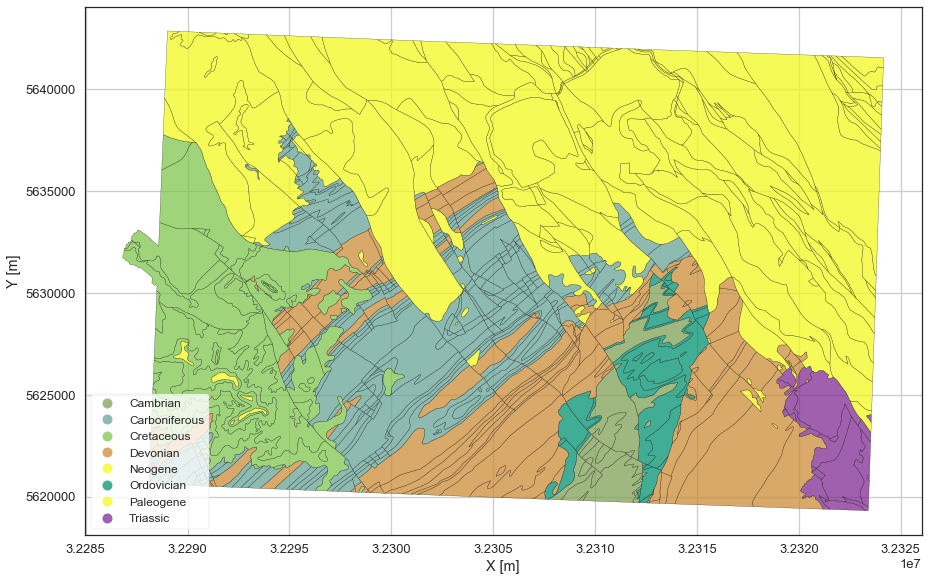

In [3]:
# Load Data
geo = gpd.read_file("data/GeologicalMapAachen.shp")
v, classes = parse_categorized_qml("data/GeologicalMap.qml")
style = pd.DataFrame(build_style_dict(v, classes)).transpose()
geo["Color"] = geo[v].replace(style.color.to_dict())
geo_wgs84 = geo.to_crs(epsg=4326)
print(geo.crs)
cols =[ ('#7fa056'),  ('#67a599'),('#7fc64e'), ('#cb8c37'), ('#f2f91d'), ('#009270'), ('#f2f91d'),('#812b92')]
fig, ax = plt.subplots(figsize=(15,15))
geo.plot(ax = ax, alpha=0.75, edgecolor='k', linewidth=0.3, column='SYSTEM1',legend=True, legend_kwds={'frameon': True,'loc': 'lower left', 'fontsize': 12}, cmap = ListedColormap(cols))
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]');

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
interfaces = gpd.read_file("data/ConceptualModel_Coordinates_repro.shp")
interfaces = pd.DataFrame(interfaces)
interfaces =interfaces[['formation','xcoord','ycoord']]
interfaces['Z'] = 200
interfaces.columns = ['formation', 'X', 'Y', 'Z']
interfaces = interfaces[['X', 'Y', 'Z','formation']]
print(type(interfaces))
interfaces


<class 'pandas.core.frame.DataFrame'>


X           Y    Z      formation
0  32301985.476 5624713.735  200  Carboniferous
1  32303662.032 5626258.797  200  Carboniferous
2  32305782.382 5627902.479  200  Carboniferous
3  32302790.881 5624565.804  200  Carboniferous
4  32304237.321 5625601.324  200  Carboniferous
..          ...         ...  ...            ...
70 32301518.000 5624293.000  200  Carboniferous
71 32295930.000 5633020.000  200       Devonian
72 32299088.000 5634984.000  200       Devonian
73 32303563.000 5637494.000  200       Devonian
74 32293520.000 5631217.000  200       Devonian

[75 rows x 4 columns]

In [6]:
orientations = gpd.read_file("data/Orientations_Coordinates_repro.shp")
orientations = pd.DataFrame(orientations)

orientations =orientations[['dip', 'azimuth', 'formation', 'xcoord', 'ycoord',]]
orientations['Z'] = 200
orientations.columns = ['dip', 'azimuth', 'formation', 'X', 'Y', 'Z']
orientations['polarity'] = 1
orientations = orientations[['X', 'Y', 'Z','formation', 'polarity', 'dip', 'azimuth']]


orientations

X           Y    Z      formation  polarity  dip  azimuth
0  32310861.360 5628412.020  200       Devonian         1   80      315
1  32308099.974 5626110.865  200       Devonian         1   80      315
2  32305848.130 5624549.367  200       Devonian         1   80      315
3  32303251.112 5622149.591  200       Devonian         1   80      315
4  32301278.693 5620752.461  200       Devonian         1   80      315
5  32311198.315 5629883.116  200  Carboniferous         1   80      315
6  32308683.481 5628149.031  200  Carboniferous         1   80      315
7  32306538.476 5626390.291  200  Carboniferous         1   80      315
8  32305018.070 5625132.874  200  Carboniferous         1   80      315
9  32303809.964 5624064.481  200  Carboniferous         1   80      315
10 32301993.695 5622815.282  200  Carboniferous         1   80      315
11 32302840.191 5624516.493  200  Carboniferous         1   45      135
12 32304286.632 5625552.013  200  Carboniferous         1   45      135
13 32305790.601 5626982.017  200  Carboniferous         1   45      135
14 32306620.660 5627886.042  200  Carboniferous         1   45      135
15 32305741.290 5627943.571  200  Carboniferous         1   45      315
16 32303588.067 5626316.325  200  Carboniferous         1   45      315
17 32301936.166 5624771.264  200  Carboniferous         1   45      315
18 32308634.171 5635726.406  200  Carboniferous         1   45      135
19 32305198.875 5633836.171  200  Carboniferous         1   45      135
20 32303916.803 5633030.767  200  Carboniferous         1   45      135
21 32299725.414 5629069.493  200  Carboniferous         1   45      135
22 32297490.006 5627310.753  200  Carboniferous         1   45      135
23 32308157.503 5636696.178  200  Carboniferous         1   45      135
24 32305034.507 5634855.254  200  Carboniferous         1   45      135
25 32302059.442 5632669.157  200  Carboniferous         1   45      135
26 32299478.861 5630269.381  200  Carboniferous         1   45      135
27 32296273.681 5627590.179  200  Carboniferous         1   45      135
28 32304672.897 5635759.279  200  Carboniferous         1   45      135
29 32301533.464 5633951.229  200  Carboniferous         1   45      135
30 32307910.951 5637550.893  200  Carboniferous         1   45      135
31 32299150.125 5632192.489  200  Carboniferous         1   45      135
32 32296355.865 5629677.655  200  Carboniferous         1   45      135
33 32308371.182 5636203.074  200        Thrust1         1   45      135
34 32305313.933 5634477.207  200        Thrust1         1   45      135
35 32302371.742 5632159.615  200        Thrust1         1   45      135
36 32299396.677 5629398.229  200        Thrust1         1   45      135
37 32297161.269 5627507.995  200        Thrust1         1   45      135
38 32308009.572 5637057.788  200        Thrust2         1   45      135
39 32304985.196 5635266.175  200        Thrust2         1   45      135
40 32301763.579 5633326.630  200        Thrust2         1   45      135
41 32299561.045 5631206.280  200        Thrust2         1   45      135
42 32297046.212 5629332.482  200        Thrust2         1   45      135
43 32295057.356 5627442.248  200        Thrust2         1   45      135
44 32307763.019 5637896.066  200        Thrust3         1   45      135
45 32304426.345 5636170.200  200        Thrust3         1   45      135
46 32301451.280 5634493.644  200        Thrust3         1   45      135
47 32298492.652 5632718.467  200        Thrust3         1   45      135
48 32295057.356 5629595.471  200        Thrust3         1   45      135
49 32298501.000 5620830.000  200  Carboniferous         1   45      315
50 32293581.000 5631055.000  200       Devonian         1   45      135
51 32296031.000 5632777.000  200       Devonian         1   45      135
52 32299190.000 5634862.000  200       Devonian         1   45      135
53 32303624.000 5637434.000  200       Devonian         1   45      135

In [7]:
geo_model = gp.create_model('ConceptualModel')

In [8]:
minz = -2800 
maxz = 500  
minx = 32293000
maxx = 32313000
miny = 5620000
maxy = 5640000

gp.init_data(geo_model, [minx, maxx, miny, maxy, minz, maxz], [100,100,75],
             surface_points_df = interfaces,
             orientations_df = orientations,
             default_values=True)

Active grids: ['regular']


ConceptualModel  2020-06-16 16:45

In [9]:
geo_model.surfaces

surface          series  order_surfaces    color  id
0  Carboniferous  Default series               1  #015482   1
1       Devonian  Default series               2  #9f0052   2
2        Thrust1  Default series               3  #ffbe00   3
3        Thrust2  Default series               4  #728f02   4
4        Thrust3  Default series               5  #443988   5

In [10]:
gp.map_stack_to_surfaces(geo_model,
                         {   'Thrust3' : ('Thrust3'),
                             'Thrust2' : ('Thrust2'),
                             'Thrust1' : ('Thrust1'),
                             "Strat_Series": ('Carboniferous', 'Devonian', 'basement'),
                          },
                         remove_unused_series=True)
geo_model.add_surfaces('basement')
geo_model.surfaces

surface        series  order_surfaces    color  id
4        Thrust3       Thrust3               1  #015482   1
3        Thrust2       Thrust2               1  #9f0052   2
2        Thrust1       Thrust1               1  #ffbe00   3
0  Carboniferous  Strat_Series               1  #728f02   4
1       Devonian  Strat_Series               2  #443988   5
5       basement  Strat_Series               3  #ff3f20   6

In [11]:
gp.get_data(geo_model, 'surface_points')

X           Y    Z  smooth   surface
53 32304385.252 5636351.005  200   0.000   Thrust3
54 32302823.754 5635479.853  200   0.000   Thrust3
55 32301377.314 5634641.576  200   0.000   Thrust3
56 32298418.686 5632833.525  200   0.000   Thrust3
57 32296939.372 5631798.005  200   0.000   Thrust3
..          ...         ...  ...     ...       ...
28 32312291.364 5629003.746  200   0.000  Devonian
71 32295930.000 5633020.000  200   0.000  Devonian
72 32299088.000 5634984.000  200   0.000  Devonian
73 32303563.000 5637494.000  200   0.000  Devonian
74 32293520.000 5631217.000  200   0.000  Devonian

[75 rows x 5 columns]

In [12]:
gp.get_data(geo_model, 'orientations')

X           Y    Z    G_x    G_y   G_z  smooth        surface
44 32307763.019 5637896.066  200  0.500 -0.500 0.707   0.010        Thrust3
45 32304426.345 5636170.200  200  0.500 -0.500 0.707   0.010        Thrust3
46 32301451.280 5634493.644  200  0.500 -0.500 0.707   0.010        Thrust3
47 32298492.652 5632718.467  200  0.500 -0.500 0.707   0.010        Thrust3
48 32295057.356 5629595.471  200  0.500 -0.500 0.707   0.010        Thrust3
38 32308009.572 5637057.788  200  0.500 -0.500 0.707   0.010        Thrust2
39 32304985.196 5635266.175  200  0.500 -0.500 0.707   0.010        Thrust2
40 32301763.579 5633326.630  200  0.500 -0.500 0.707   0.010        Thrust2
41 32299561.045 5631206.280  200  0.500 -0.500 0.707   0.010        Thrust2
42 32297046.212 5629332.482  200  0.500 -0.500 0.707   0.010        Thrust2
43 32295057.356 5627442.248  200  0.500 -0.500 0.707   0.010        Thrust2
33 32308371.182 5636203.074  200  0.500 -0.500 0.707   0.010        Thrust1
34 32305313.933 5634477.207  200  0.500 -0.500 0.707   0.010        Thrust1
35 32302371.742 5632159.615  200  0.500 -0.500 0.707   0.010        Thrust1
36 32299396.677 5629398.229  200  0.500 -0.500 0.707   0.010        Thrust1
37 32297161.269 5627507.995  200  0.500 -0.500 0.707   0.010        Thrust1
5  32311198.315 5629883.116  200 -0.696  0.696 0.174   0.010  Carboniferous
6  32308683.481 5628149.031  200 -0.696  0.696 0.174   0.010  Carboniferous
7  32306538.476 5626390.291  200 -0.696  0.696 0.174   0.010  Carboniferous
8  32305018.070 5625132.874  200 -0.696  0.696 0.174   0.010  Carboniferous
9  32303809.964 5624064.481  200 -0.696  0.696 0.174   0.010  Carboniferous
10 32301993.695 5622815.282  200 -0.696  0.696 0.174   0.010  Carboniferous
11 32302840.191 5624516.493  200  0.500 -0.500 0.707   0.010  Carboniferous
12 32304286.632 5625552.013  200  0.500 -0.500 0.707   0.010  Carboniferous
13 32305790.601 5626982.017  200  0.500 -0.500 0.707   0.010  Carboniferous
14 32306620.660 5627886.042  200  0.500 -0.500 0.707   0.010  Carboniferous
15 32305741.290 5627943.571  200 -0.500  0.500 0.707   0.010  Carboniferous
16 32303588.067 5626316.325  200 -0.500  0.500 0.707   0.010  Carboniferous
17 32301936.166 5624771.264  200 -0.500  0.500 0.707   0.010  Carboniferous
18 32308634.171 5635726.406  200  0.500 -0.500 0.707   0.010  Carboniferous
19 32305198.875 5633836.171  200  0.500 -0.500 0.707   0.010  Carboniferous
20 32303916.803 5633030.767  200  0.500 -0.500 0.707   0.010  Carboniferous
21 32299725.414 5629069.493  200  0.500 -0.500 0.707   0.010  Carboniferous
22 32297490.006 5627310.753  200  0.500 -0.500 0.707   0.010  Carboniferous
23 32308157.503 5636696.178  200  0.500 -0.500 0.707   0.010  Carboniferous
24 32305034.507 5634855.254  200  0.500 -0.500 0.707   0.010  Carboniferous
25 32302059.442 5632669.157  200  0.500 -0.500 0.707   0.010  Carboniferous
26 32299478.861 5630269.381  200  0.500 -0.500 0.707   0.010  Carboniferous
27 32296273.681 5627590.179  200  0.500 -0.500 0.707   0.010  Carboniferous
28 32304672.897 5635759.279  200  0.500 -0.500 0.707   0.010  Carboniferous
29 32301533.464 5633951.229  200  0.500 -0.500 0.707   0.010  Carboniferous
30 32307910.951 5637550.893  200  0.500 -0.500 0.707   0.010  Carboniferous
31 32299150.125 5632192.489  200  0.500 -0.500 0.707   0.010  Carboniferous
32 32296355.865 5629677.655  200  0.500 -0.500 0.707   0.010  Carboniferous
49 32298501.000 5620830.000  200 -0.500  0.500 0.707   0.010  Carboniferous
0  32310861.360 5628412.020  200 -0.696  0.696 0.174   0.010       Devonian
1  32308099.974 5626110.865  200 -0.696  0.696 0.174   0.010       Devonian
2  32305848.130 5624549.367  200 -0.696  0.696 0.174   0.010       Devonian
3  32303251.112 5622149.591  200 -0.696  0.696 0.174   0.010       Devonian
4  32301278.693 5620752.461  200 -0.696  0.696 0.174   0.010       Devonian
50 32293581.000 5631055.000  200  0.500 -0.500 0.707   0.010       Devonian
51 32296031.000 5632777.000  200  0.500 -0.500 0.707   0.010  

In [13]:
geo_model.set_is_fault(['Thrust1'])
geo_model.set_is_fault(['Thrust2'])
geo_model.set_is_fault(['Thrust3'])

Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.


order_series BottomRelation  isActive  isFault  isFinite
Thrust3                  1          Fault      True     True     False
Thrust2                  2          Fault      True     True     False
Thrust1                  3          Fault      True     True     False
Strat_Series             4        Erosion      True    False     False

In [14]:
#Sections for coordinates obtained from previous clicking
section_dict = {'section1': ([32296836.414757043, 5636029.445925801], [32309932.123579897, 5621770.800279849], [100, 80])}
geo_model.set_section_grid(section_dict)

Active grids: ['regular' 'sections']


start                                     stop resolution      dist
section1  [32296836.414757043, 5636029.445925801]  [32309932.123579897, 5621770.800279849]  [100, 80] 19359.922

C:/Users/user_abuser/Documents/gemgis/gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


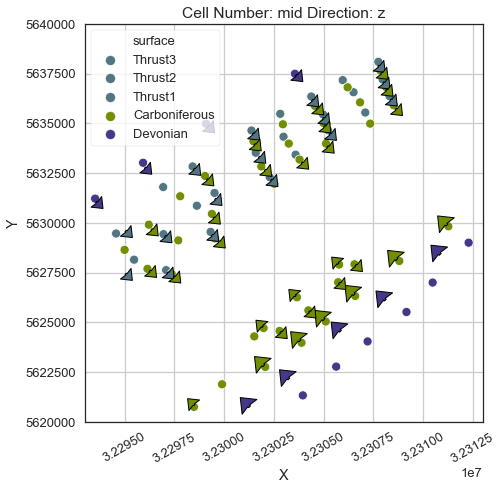

In [15]:
gp.plot_2d(geo_model, direction = 'z')
plt.grid()

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography' 'sections']


C:/Users/user_abuser/Documents/gemgis/gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


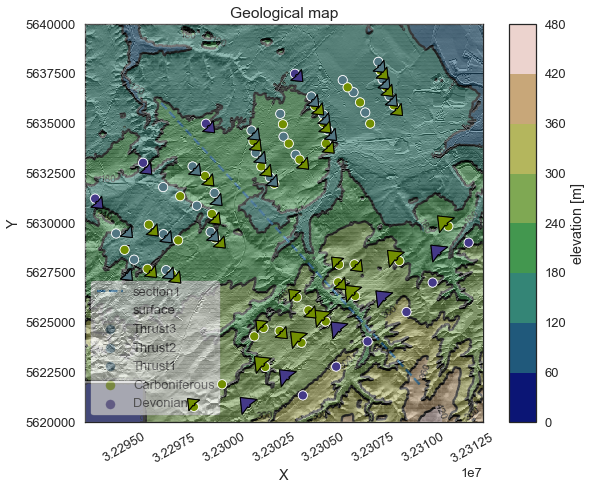

In [16]:
fp='data/DEM50_Weisweiler_EPSG4647.tif'
geo_model.set_topography(source='gdal', filepath=fp)
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_lith=False,
           show_boundaries=False,show_section_traces=True,
           kwargs_topography={'cmap': 'gist_earth', 'norm': None}
           )


In [17]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  3
Compilation Done!
Kriging values: 
                        values
range               28476.130
$C_o$            19306904.762
drift equations  [3, 3, 3, 3]


In [18]:
gp.get_data(geo_model, 'kriging')

values
range               28476.130
$C_o$            19306904.762
drift equations  [3, 3, 3, 3]

In [19]:
sol = gp.compute_model(geo_model)

C:/Users/user_abuser/Documents/gemgis/gempy\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))
C:/Users/user_abuser/Documents/gemgis/gempy\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:1
  '; Surface Number:' + str(s_n))
C:/Users/user_abuser/Documents/gemgis/gempy\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:2
  '; Surface Number:' + str(s_n))
C:/Users/user_abuser/Documents/gemgis/gempy\gempy\core\solution.py:315

C:/Users/user_abuser/Documents/gemgis/gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


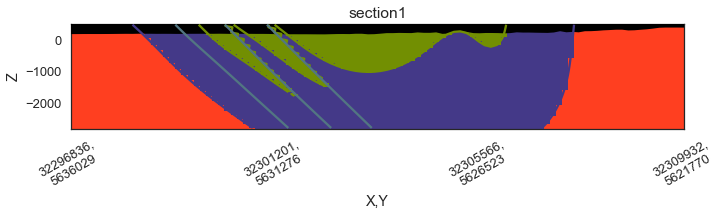

In [20]:
gp.plot_2d(geo_model, section_names=['section1'], ve = 1, show_topography=True)
plt.show()

ValueError: cannot reshape array of size 160000 into shape (100,100)

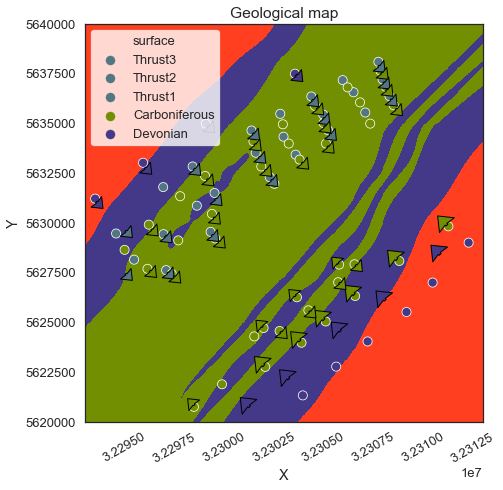

In [21]:
gp.plot_2d(geo_model, section_names=['topography'], show_contours = False)

In [22]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, 
                 show_surfaces=True,
                 show_lith=True, 
                 image=False, 
                 show_results=True,
                 plotter_type='basic', 
                 ve=1)

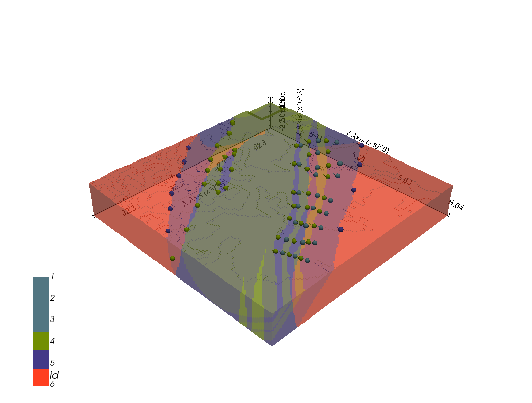

In [24]:
gp.plot_3d(geo_model, image=True)